In [70]:
data = pd.read_csv("/home/eilia/jetbrains/data/email", delimiter = "\t", header=None, names=["avg_formal", "votes_formal", "id", "text"])

In [71]:
data

,avg_formal,votes_formal,id,text
0,-1.25,"-2.0,-1.0,-1.0,-1.0",JebBush_45511.1,"We tried to run a similar piece , which appare..."
1,-0.80,"-3.0,-1.0,-1.0,0.0,1.0",JebBush_86269.0,It worries and upsets me that this bill has be...
2,1.20,"-1.0,1.0,1.0,2.0,3.0",JebBush_42595.0,I know you realize the importance of this appo...
3,0.75,"-1.0,1.0,1.0,2.0",JebBush_110653.0,"Dear Jeb , I wrote to you previously to recomm..."
4,1.20,"-2.0,1.0,2.0,2.0,3.0",JebBush_127867.0,A new documentary -- Waco : The Rules of Engag...
...,...,...,...,...
1603,-2.60,"-3.0,-3.0,-3.0,-2.0,-2.0",JebBush_104133.1,"Free software , free e - mail , and free Inter..."
1604,-0.60,"-2.0,-2.0,-1.0,1.0,1.0",JebBush_67785.2,It was a great experience .
1605,1.00,"-2.0,1.0,1.0,2.0,3.0",JebBush_86326.0,Thank you for the kind words about Cecilia .
1606,0.60,"-1.0,0.0,0.0,2.0,2.0",JebBush_121499.0,"Thank you for giving people a "" choice "" to pu..."


In [72]:
data = data.dropna()

In [74]:
data["avg_formal"] = data["avg_formal"].astype(float)

/scratch-local/eilia.10807663/ipykernel_1206541/3126813839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["avg_formal"] = data["avg_formal"].astype(float)


In [75]:
data["votes_formal"] = data["votes_formal"].str.split(',')

/scratch-local/eilia.10807663/ipykernel_1206541/3765254539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["votes_formal"] = data["votes_formal"].str.split(',')


In [76]:
def get_int_list(l):
    # return [ast.literal_eval(x) for x in l]
    return [float(x) for x in l]


In [77]:
data["votes_formal"] = data["votes_formal"].apply(get_int_list)

/scratch-local/eilia.10807663/ipykernel_1206541/1456169003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["votes_formal"] = data["votes_formal"].apply(get_int_list)


In [78]:
data.iloc[5]["id"]

'JebBush_79654.1'

In [79]:
data.iloc[5]["text"]

'It was very gracious of your office .'

In [80]:
data.iloc[5]["avg_formal"]

1.2

In [81]:
data.iloc[5]["votes_formal"]

[-3.0, 1.0, 2.0, 3.0, 3.0]

### Analysis of results

In [42]:
import json
import statistics
import matplotlib.pyplot as plt

In [63]:
with open('/home/eilia/jetbrains/outputs/evaluation/answers-500-mistral-12b-avg_sign-evaluation.json') as f:
    d = json.load(f)

In [64]:
d['metadata']

{'dataset': 'answers',
 'model': 'mistral-12b',
 'prompt': 'instruction_prompt',
 'num_datapoints': 500,
 'gold_label_transform': 'avg_sign',
 'classification_performance_metrics': {'f1': 0.5794066317626527,
  'precision': 0.4129353233830846,
  'recall': 0.9707602339181286,
  'accuracy': 0.518}}

When do misclassifications occur?

In [65]:
stdevs_incorr_class = [statistics.stdev(item['votes_formal']) for item in d['data'] if (item['prediction'] != item['binary_label']) and (len(item['votes_formal'])>1)]
means_incorr_class = [statistics.mean(item['votes_formal']) for item in d['data'] if (item['prediction'] != item['binary_label']) and (len(item['votes_formal'])>1)]

stdevs_corr_class = [statistics.stdev(item['votes_formal']) for item in d['data'] if (item['prediction'] == item['binary_label']) and (len(item['votes_formal'])>1)]
means_corr_class = [statistics.mean(item['votes_formal']) for item in d['data'] if (item['prediction'] == item['binary_label']) and (len(item['votes_formal'])>1)]


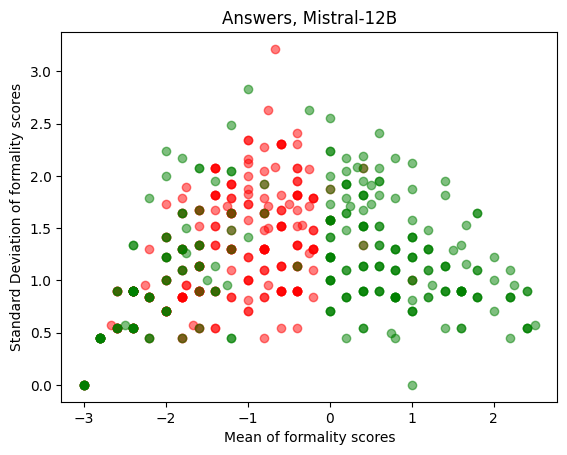

In [67]:
plt.scatter(means_incorr_class, stdevs_incorr_class, alpha=0.5, color = 'red')
plt.scatter(means_corr_class, stdevs_corr_class, alpha=0.5, color='green')

plt.xlabel('Mean of formality scores')
plt.ylabel('Standard Deviation of formality scores') #high standard deviation - scores were more spread out
plt.title('Answers, Mistral-12B')
plt.savefig('answers-500-mistral-12b-avg_sign-means_stdevs.pdf')